In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

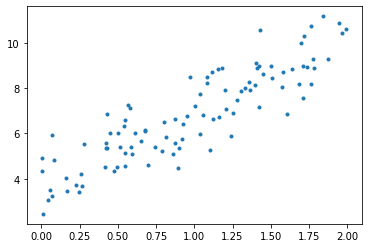

In [2]:
import matplotlib.pyplot as plt

plt.plot(X,y, ".")
plt.show()

In [3]:
X_b = np.c_[np.ones((100,1)), X] # add x0 = 1 to each instance
# theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [4]:
theta_best

array([[3.67952956],
       [3.2249568 ]])

In [5]:
X_new  = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # Add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[ 3.67952956],
       [10.12944315]])

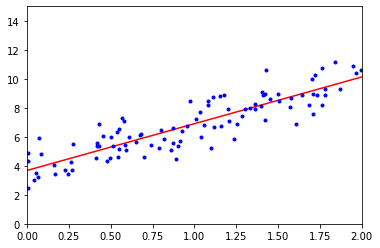

In [6]:
plt.plot(X_new, y_predict, "r-") # Two end points of the line segement
plt.plot(X, y, "b.") # The scatter plot
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print( lin_reg.intercept_)
print(lin_reg.coef_)
print(lin_reg.predict(X_new))

[3.67952956]
[[3.2249568]]
[[ 3.67952956]
 [10.12944315]]


In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print(theta_best_svd)
print(residuals)
print(rank)
print(s)

[[3.67952956]
 [3.2249568 ]]
[90.68817214]
2
[14.46560487  3.81734886]


In [9]:
np.linalg.pinv(X_b) @ y

array([[3.67952956],
       [3.2249568 ]])

# Batch Gradient Decent

In [10]:
eta = 0.1 # learning rate
n_iterations = 10000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T @ (X_b @ theta - y)
    theta -= eta * gradients
theta

array([[3.67952956],
       [3.2249568 ]])

# Stochastic Gradient Descent

In [11]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index: random_index+1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch*m + i)
        theta -= eta * gradients
theta

array([[3.68196065],
       [3.19062166]])

In [14]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [16]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.6812523]), array([3.24472093]))

# Polynominal Regression

In [18]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

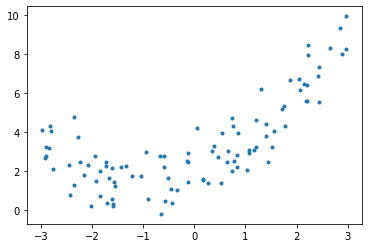

In [21]:
plt.plot(X, y, ".")

In [25]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[1.7797457]
[1.7797457  3.16749475]


In [26]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_,  lin_reg.coef_

(array([1.94531139]), array([[0.96906059, 0.48497512]]))

# Learning Curves

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

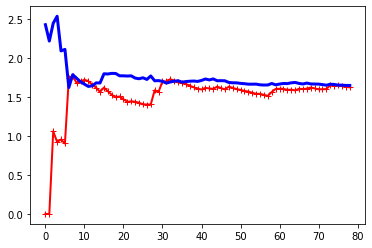

In [36]:
# Linear model (underfitting)
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

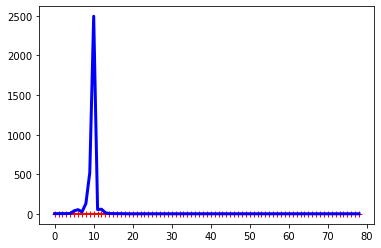

In [38]:
# High order model (overfitting)
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
                ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                ("lin_reg", LinearRegression()),
            ])
plot_learning_curves(polynomial_regression, X, y)

# Regularized Linear Models
## Ridge Regression

In [43]:
from sklearn.linear_model import Ridge

# Ridge Regression by closed-form solution
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.70529763]])

In [44]:
# Ridge Regression by Stocastix Gradient Descent
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.68821898])

## Lasso Regression

In [45]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.65695103])

## Elastic Net

In [46]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.66095935])

## Early Stopping

In [50]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

# Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# prepare the data
poly_scaler = Pipeline([
        ("poly_deatures", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                      penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel()) # continues where it ledt off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

# Logistic Regression
## Decision Boundaries

In [51]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [52]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris virginica, else 0

In [53]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

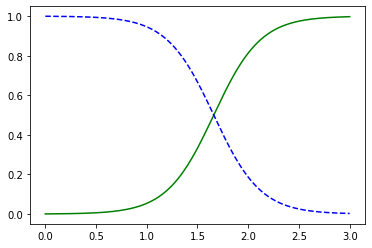

In [54]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

In [55]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

# Softmax Regression

In [58]:
X = iris["data"][:, (2,3)] # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [59]:
softmax_reg.predict([[5, 2]])

array([2])

In [60]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])